In [38]:
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image, ImageFont, ImageDraw
from IPython.display import display
import pandas as pd 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn import svm
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc

Understanding Wine Attributes and Properties

- fixed acidity: Acids are one of the fundamental properties of wine and contribute greatly to the taste of the wine. Reducing acids significantly might lead to wines tasting flat. Fixed acids include tartaric, malic, citric, and succinic acids which are found in grapes (except succinic). 

- volatile acidity: These acids are to be distilled out from the wine before completing the production process. It is primarily constituted of acetic acid though other acids like lactic, formic and butyric acids might also be present. Excess of volatile acids are undesirable and lead to unpleasant flavor. In the US, the legal limits of volatile acidity are 1.2 g/L for red table wine and 1.1 g/L for white table wine. 

- citric acid: This is one of the fixed acids which gives a wine its freshness. Usually most of it is consumed during the fermentation process and sometimes it is added separately to give the wine more freshness. 

- residual sugar: This typically refers to the natural sugar from grapes which remains after the fermentation process stops, or is stopped. 

- chlorides: This is usually a major contributor to saltiness in wine.

- free sulfur dioxide: This is the part of the sulphur dioxide that when added to a wine is said to be free after the remaining part binds. Winemakers will always try to get the highest proportion of free sulphur to bind. They are also known as sulfites and too much of it is undesirable and gives a pungent odour. 

- total sulfur dioxide: This is the sum total of the bound and the free sulfur dioxide (SO2). This is mainly added to kill harmful bacteria and preserve quality and freshness. There are usually legal limits for sulfur levels in wines and excess of it can even kill good yeast and give out undesirable odour.

- density: This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol. 

- pH: Also known as the potential of hydrogen, this is a numeric scale to specify the acidity or basicity the wine. Fixed acidity contributes the most towards the pH of wines. You might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.

- sulphates: These are mineral salts containing sulfur. Sulphates are to wine as gluten is to food. They are a regular part of the winemaking around the world and are considered essential. They are connected to the fermentation process and affects the wine aroma and flavor. 

- alcohol: Wine is an alcoholic beverage. Alcohol is formed as a result of yeast converting sugar during the fermentation process. The percentage of alcohol can vary from wine to wine. Hence it is not a surprise for this attribute to be a part of this dataset. It's usually measured in % vol or alcohol by volume (ABV).

- quality: Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.

In [3]:
data_red = pd.read_csv('winequality-red.csv')

data_red.info()

## 11 features, which are all numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
## check for missing values
data_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

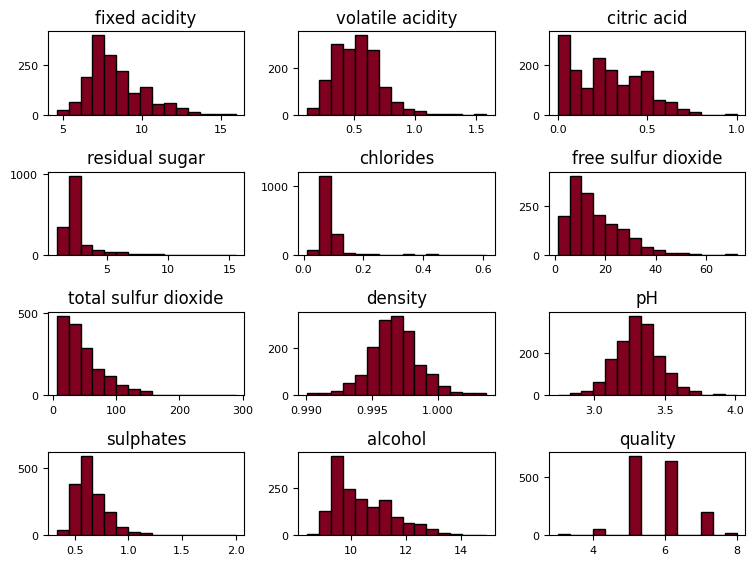

In [6]:
data_red.hist(bins=15, color='#800020', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

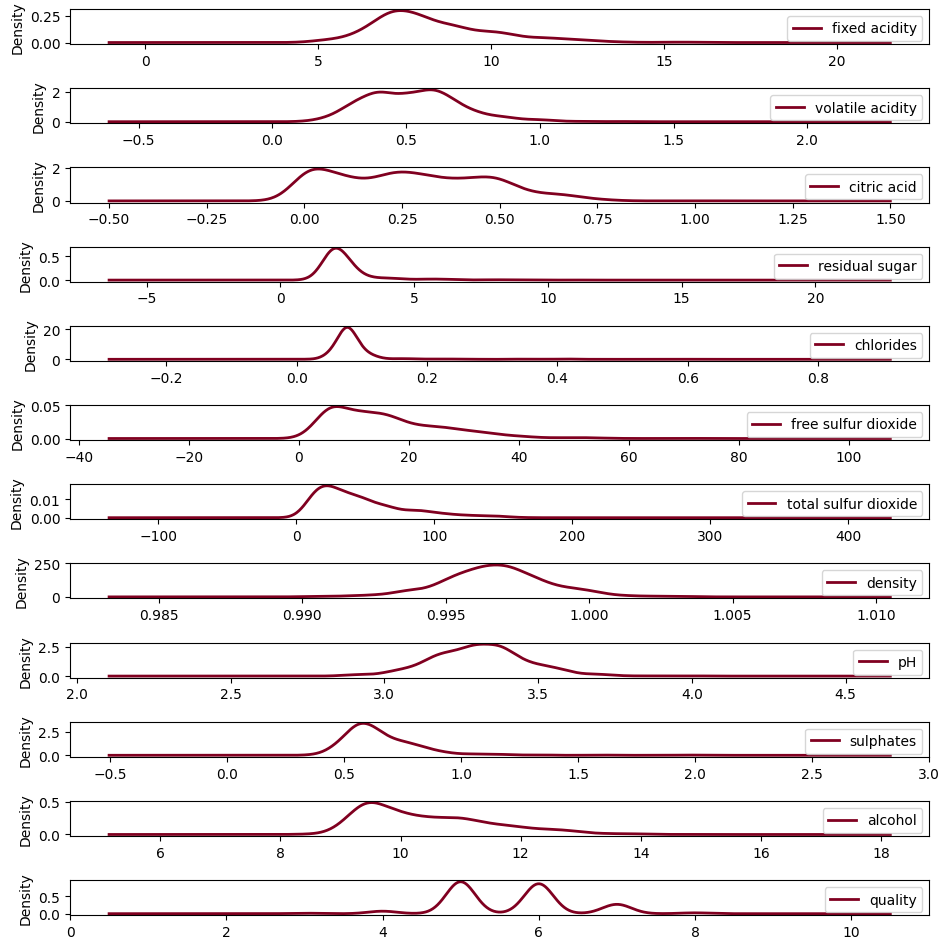

In [11]:
data_red.plot.density(subplots=True, figsize=(8, 8), sharex=False, color='#800020', linewidth=2.0)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.show()

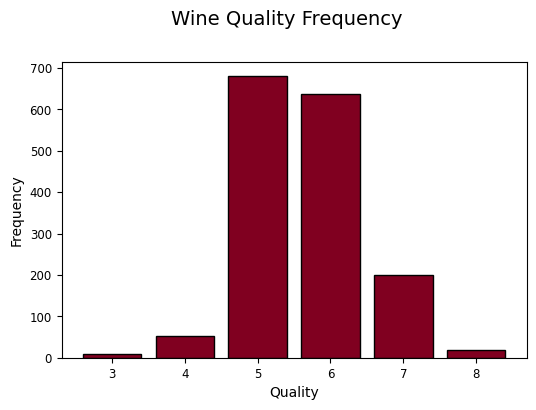

In [13]:
# Bar Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Wine Quality Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Quality")
ax.set_ylabel("Frequency") 
wine_qual = data_red['quality'].value_counts()
wine_qual = (list(wine_qual.index), list(wine_qual.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(wine_qual[0], wine_qual[1], color='#800020', 
        edgecolor='black', linewidth=1)

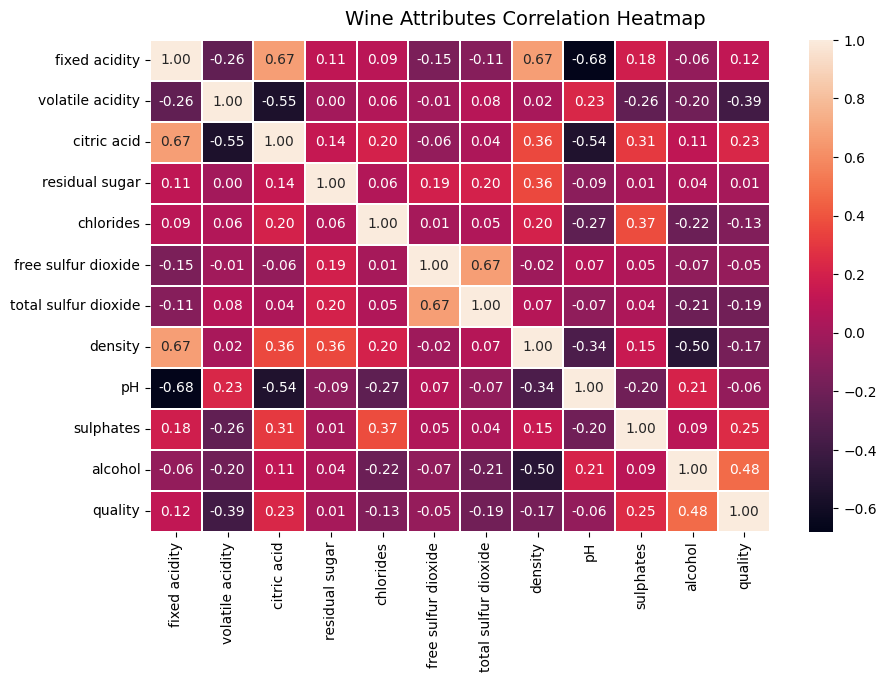

In [15]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = data_red.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="rocket",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

C:\Users\irina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


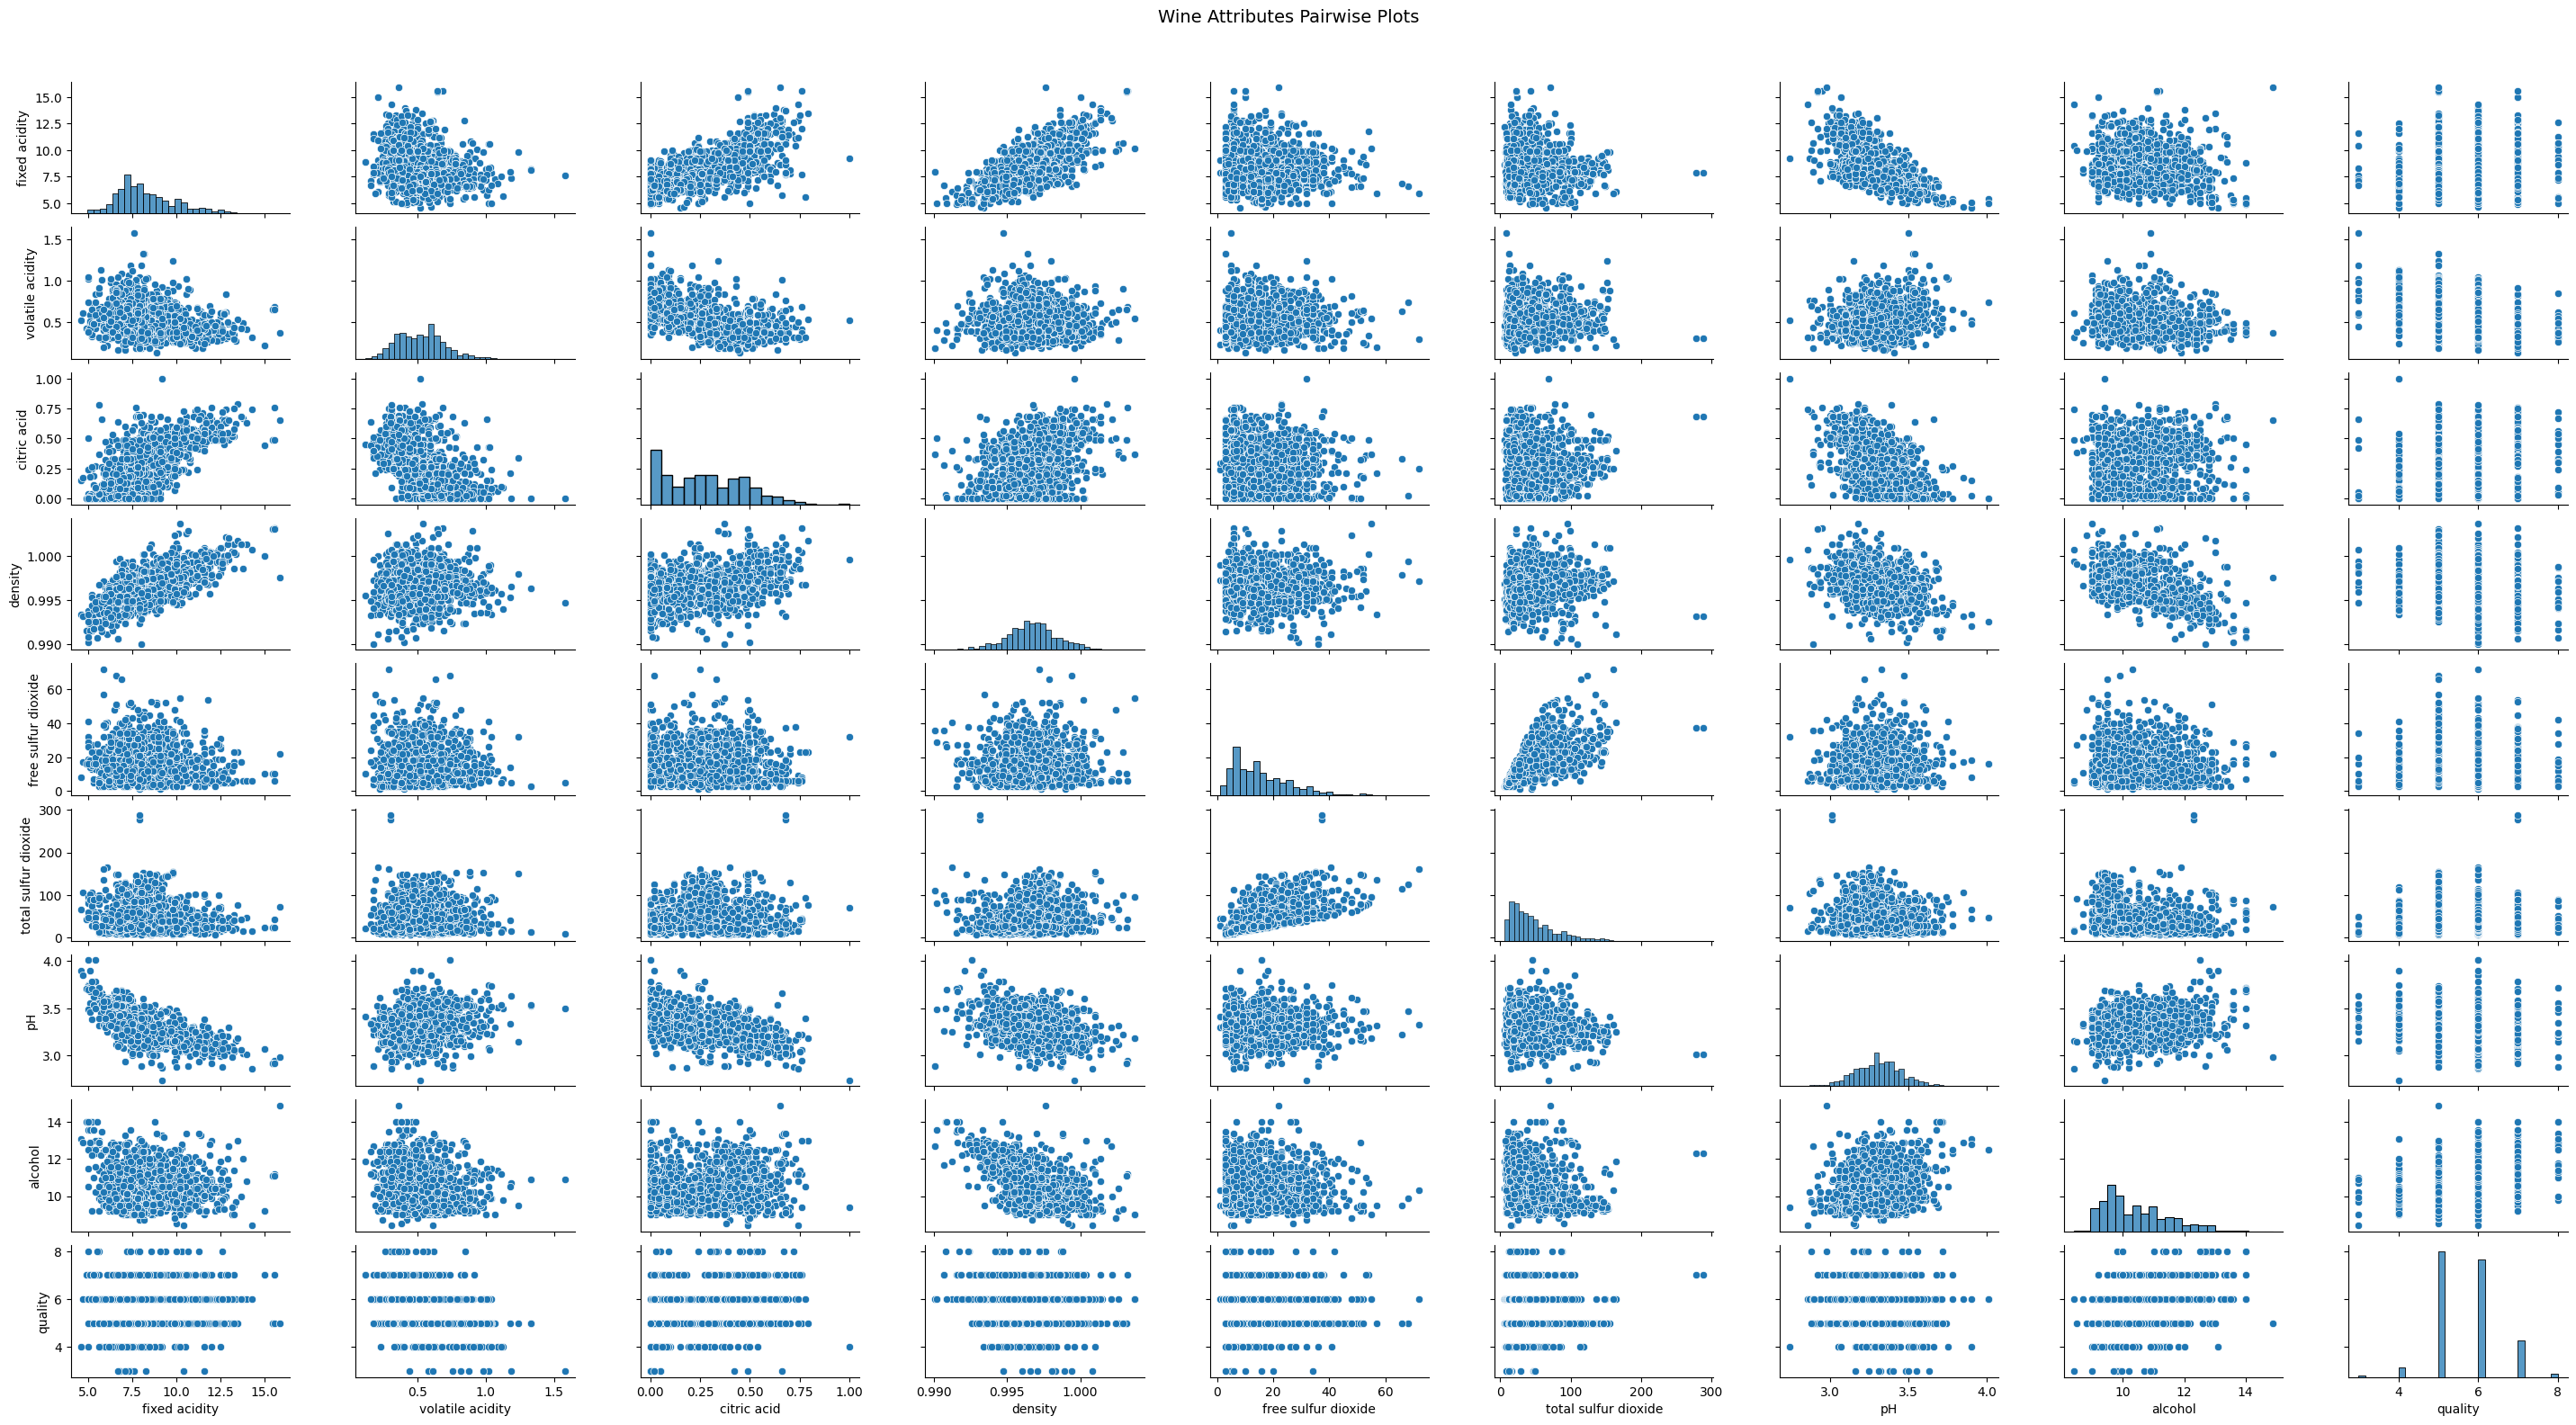

In [23]:
# Pair-wise Scatter Plots
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'density', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'alcohol', 'quality']
pp = sns.pairplot(data_red[cols], size=1.8, aspect=1.8)

fig = pp.fig ;
fig.subplots_adjust(top=0.93, wspace=0.3);
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14);

# Model

- separate into dep and indep variables
- 12 features - will likely need dimensionality reduction

- normalised data vs PCA reduced data 

In [36]:
data_norm = normalize(data_red)

data_norm = pd.DataFrame(data_norm, columns= data_red.columns)

data_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728
1,0.106989,0.012071,0.000000,0.035663,0.001344,0.342913,0.919006,0.013673,0.043893,0.009327,0.134422,0.068583
2,0.134949,0.013149,0.000692,0.039793,0.001592,0.259517,0.934261,0.017249,0.056402,0.011246,0.169551,0.086506
3,0.173611,0.004340,0.008681,0.029452,0.001163,0.263517,0.930059,0.015470,0.048983,0.008991,0.151910,0.093006
4,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728


In [37]:
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


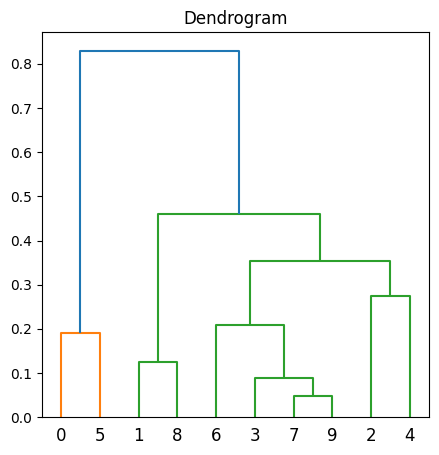

In [39]:
## dendrogram
subset_data = data_norm.sample(n=10)

plt.figure(figsize=(5,5))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(subset_data, method='ward'))

plt.show()

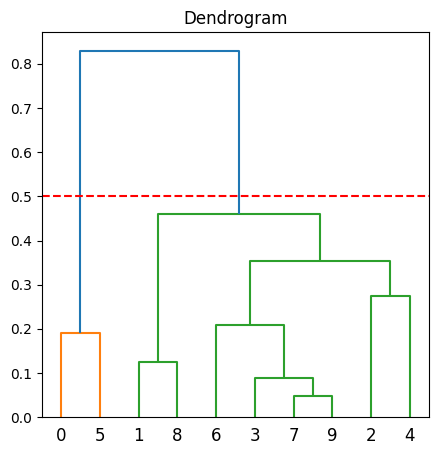

In [40]:
## break
plt.figure(figsize=(5,5))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(subset_data, method='ward'))
plt.axhline(y=0.5, color = 'r', linestyle = '--')

In [41]:
## dimensionalithy reduction using pca
pca = PCA(n_components=2)

reduced_data = pca.fit_transform(data_norm)

In [43]:
## train model
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')

now = cluster.fit_predict(reduced_data)

Text(0.5, 1.0, 'Scatter plot of red wine data')

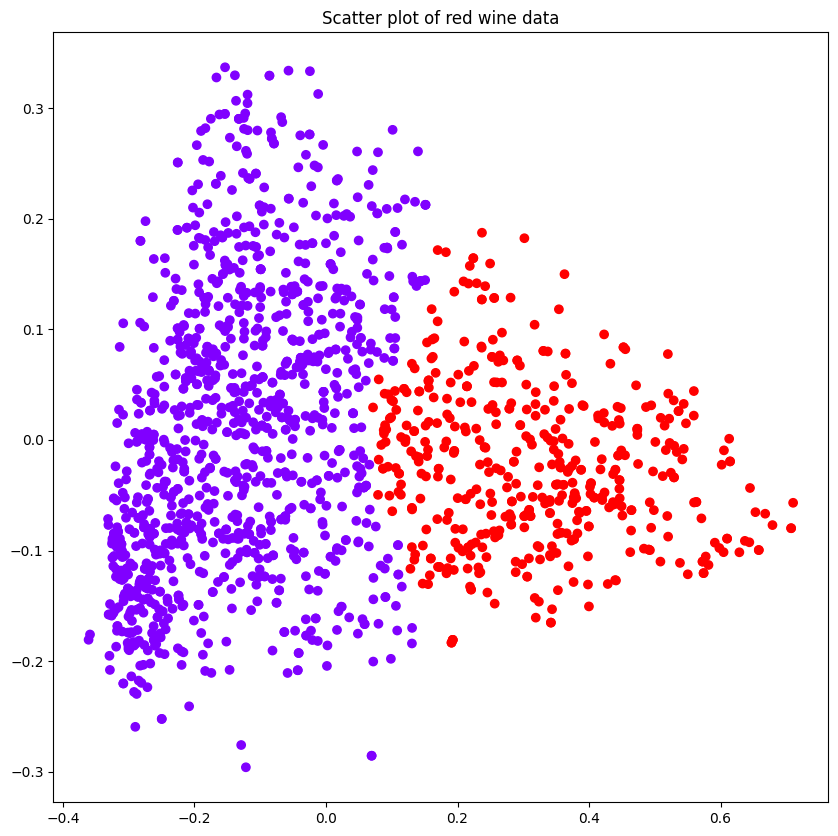

In [44]:
## visualize our cluster
plt.figure(figsize=(10,10))
plt.scatter(x=reduced_data[:,0], y = reduced_data[:,1], c=cluster.labels_, cmap='rainbow')
plt.title('Scatter plot of red wine data')

In [53]:
# Checking ideal number of clusters with silhouette score
# Silhouette scores varies between -1 and 1, it must be above 0 to be good and the closer to one the better
from sklearn.metrics import silhouette_score
for i in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage='ward')
    cluster.fit_predict(reduced_data)
    score = silhouette_score(reduced_data, cluster.labels_, metric='euclidean')
    print('Silhouette Average Score for {} clusters is {}:'.format(i,score))


Silhouette Average Score for 2 clusters is 0.5127505469028423:
Silhouette Average Score for 3 clusters is 0.3986288534384242:
Silhouette Average Score for 4 clusters is 0.37355497879843413:
Silhouette Average Score for 5 clusters is 0.34991293709949267:
Silhouette Average Score for 6 clusters is 0.340631918426086:
Silhouette Average Score for 7 clusters is 0.33381547841370285:
Silhouette Average Score for 8 clusters is 0.321104186113258:
Silhouette Average Score for 9 clusters is 0.33290381696220633:
Silhouette Average Score for 10 clusters is 0.33459260935086815:


In [45]:
cluster1 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')

now1= cluster.fit_predict(data_norm)

In [47]:
data_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728
1,0.106989,0.012071,0.000000,0.035663,0.001344,0.342913,0.919006,0.013673,0.043893,0.009327,0.134422,0.068583
2,0.134949,0.013149,0.000692,0.039793,0.001592,0.259517,0.934261,0.017249,0.056402,0.011246,0.169551,0.086506
3,0.173611,0.004340,0.008681,0.029452,0.001163,0.263517,0.930059,0.015470,0.048983,0.008991,0.151910,0.093006
4,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.110445,0.010688,0.001425,0.035628,0.001603,0.570040,0.783805,0.017723,0.061457,0.010332,0.187044,0.089069
1595,0.089586,0.008351,0.001518,0.033405,0.000941,0.592177,0.774385,0.015110,0.053448,0.011540,0.170061,0.091104
1596,0.122232,0.009895,0.002522,0.044624,0.001475,0.562655,0.776076,0.019319,0.066354,0.014551,0.213421,0.116411
1597,0.105248,0.011506,0.002141,0.035677,0.001338,0.570835,0.784898,0.017758,0.063684,0.012665,0.181954,0.089193


Text(0.5, 1.0, 'Scatter plot of red wine data')

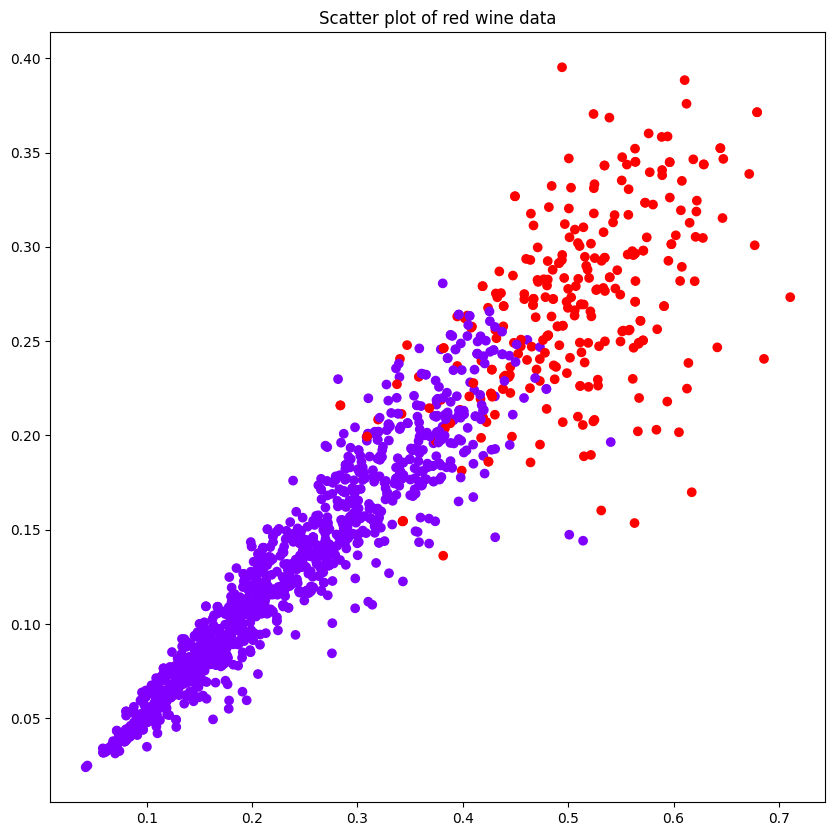

In [48]:
## visualize our cluster
plt.figure(figsize=(10,10))
plt.scatter(x=data_norm['alcohol'], y = data_norm['quality'], c=cluster.labels_, cmap='rainbow')
plt.title('Scatter plot of red wine data')

In [54]:
# Checking ideal number of clusters with silhouette score
# Silhouette scores varies between -1 and 1, it must be above 0 to be good and the closer to one the better
from sklearn.metrics import silhouette_score
for i in range(2,11):
    cluster1 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
    cluster1.fit_predict(data_norm)
    score = silhouette_score(data_norm, cluster1.labels_, metric='euclidean')
    print('Silhouette Average Score for {} clusters is {}:'.format(i,score))

## 

Silhouette Average Score for 2 clusters is 0.4731176140744563:
Silhouette Average Score for 3 clusters is 0.4731176140744563:
Silhouette Average Score for 4 clusters is 0.4731176140744563:
Silhouette Average Score for 5 clusters is 0.4731176140744563:
Silhouette Average Score for 6 clusters is 0.4731176140744563:
Silhouette Average Score for 7 clusters is 0.4731176140744563:
Silhouette Average Score for 8 clusters is 0.4731176140744563:
Silhouette Average Score for 9 clusters is 0.4731176140744563:
Silhouette Average Score for 10 clusters is 0.4731176140744563:


In [32]:
kmeans = KMeans(n_clusters = 3, n_init=15)
kmeans.fit(data_red)

print('WCSS: ', kmeans.inertia_)
print('Iterations until converged: ', kmeans.n_iter_)
print('Final centroids: ')
print(kmeans.cluster_centers_)
print('Cluster assignments ')
print(kmeans.labels_)

WCSS:  396300.4247168416
Iterations until converged:  5
Final centroids: 
[[8.26564885e+00 5.20648855e-01 2.70171756e-01 2.48816794e+00
  9.17080153e-02 2.18540076e+01 5.55496183e+01 9.96857672e-01
  3.32225191e+00 6.76698473e-01 1.03483461e+01 5.60877863e+00]
 [8.47841727e+00 5.19454436e-01 2.70131894e-01 2.37020384e+00
  8.45323741e-02 9.14868106e+00 2.28345324e+01 9.96622602e-01
  3.31032374e+00 6.48261391e-01 1.05895284e+01 5.74820144e+00]
 [7.88755187e+00 5.72365145e-01 2.75643154e-01 3.23236515e+00
  8.83983402e-02 2.61514523e+01 1.08506224e+02 9.96934730e-01
  3.28962656e+00 6.52033195e-01 1.00089212e+01 5.30705394e+00]]
Cluster assignments 
[1 0 0 ... 0 0 0]


KMeans(n_clusters=3, n_init=15)